In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [107]:
data_pop = pd.read_csv("../Data/Clean/ACS/ACSDP052020_clean.csv", index_col = 0)

In [108]:
data_covid = pd.read_csv("../Data/Intermediate/COVIDcounty_cases_processed_2020.csv", index_col = 0)

In [109]:
data_pop = data_pop.loc[:,["total_pop","year","fips"]]


In [110]:
data_pop.head()

,total_pop,year,fips
0,55639,2020,1001
1,218289,2020,1003
2,25026,2020,1005
3,22374,2020,1007
4,57755,2020,1009


In [111]:
data_covid.head()

,year,fips,covid_cases,county_name
0,2020,1001,4164,Autauga County
3,2020,1003,13392,Baldwin County
6,2020,1005,1492,Barbour County
9,2020,1007,1817,Bibb County
12,2020,1009,4584,Blount County


In [112]:
df = pd.merge(data_covid, data_pop,
             how = 'outer', on =['year', 'fips'])

In [113]:
df.head()

,year,fips,covid_cases,county_name,total_pop
0,2020,1001,4164.0,Autauga County,55639.0
1,2020,1003,13392.0,Baldwin County,218289.0
2,2020,1005,1492.0,Barbour County,25026.0
3,2020,1007,1817.0,Bibb County,22374.0
4,2020,1009,4584.0,Blount County,57755.0


In [114]:
df.dtypes

year             int64
fips             int64
covid_cases    float64
county_name     object
total_pop      float64
dtype: object

In [115]:
#df["total_pop"] = df["total_pop"].astype("int64",errors = "ignore")
df["covid_cases_rate"] = df.loc[:,"covid_cases"]/df.loc[:,"total_pop"]
df.head()

,year,fips,covid_cases,county_name,total_pop,covid_cases_rate
0,2020,1001,4164.0,Autauga County,55639.0,0.074840
1,2020,1003,13392.0,Baldwin County,218289.0,0.061350
2,2020,1005,1492.0,Barbour County,25026.0,0.059618
3,2020,1007,1817.0,Bibb County,22374.0,0.081210
4,2020,1009,4584.0,Blount County,57755.0,0.079370


In [116]:
df.insert(loc = 5, column = "covid_cases_over_total_pop", value = df.loc[:,"covid_cases"/df.loc[:,"total_pop"]

SyntaxError: unexpected EOF while parsing (306163646.py, line 1)

In [117]:
data_STD = pd.read_csv("../Data/Intermediate/CDCSTDoverall2000_2020_processed.csv")

In [118]:
data_STD = data_STD.loc[:,["year","fips","cases_chlamydia","cases_gonorrhea"]]


In [119]:
data_STD.head()

,year,fips,cases_chlamydia,cases_gonorrhea
0,2000,45001,61.0,57.0
1,2000,22001,0.0,0.0
2,2000,51001,153.0,88.0
3,2000,16001,644.0,33.0
4,2000,19001,8.0,0.0


In [120]:
data_STD.tail()

,year,fips,cases_chlamydia,cases_gonorrhea
67581,2020,4027,982.0,192.0
67582,2020,8125,14.0,1.0
67583,2020,48505,46.0,4.0
67584,2020,48507,42.0,11.0
67585,2020,46137,17.0,12.0


In [121]:
df2= pd.merge(data_STD, data_pop,
             how = 'outer', on =['year', 'fips'])

In [122]:
df2.head()

,year,fips,cases_chlamydia,cases_gonorrhea,total_pop
0,2000,45001,61.0,57.0,NaN
1,2000,22001,0.0,0.0,NaN
2,2000,51001,153.0,88.0,NaN
3,2000,16001,644.0,33.0,NaN
4,2000,19001,8.0,0.0,NaN


In [123]:
df2.tail()

,year,fips,cases_chlamydia,cases_gonorrhea,total_pop
67589,2020,2195,NaN,NaN,3278.0
67590,2020,2230,NaN,NaN,1300.0
67591,2020,2275,NaN,NaN,2510.0
67592,2020,30105,NaN,NaN,7424.0
67593,2020,48423,NaN,NaN,230184.0


In [124]:
df2.to_csv('../Data/Intermediate/STD_totalpopulation_merge.csv')

In [125]:
data_STD_2020 = data_STD.iloc[64364:67593]
data_STD_2020.head()

,year,fips,cases_chlamydia,cases_gonorrhea
64364,2020,45001,99.0,69.0
64365,2020,22001,369.0,140.0
64366,2020,51001,210.0,66.0
64367,2020,16001,2163.0,601.0
64368,2020,19001,24.0,7.0


In [126]:
df3= pd.merge(data_STD_2020, data_pop,
             how = 'outer', on =['year', 'fips'])
df3.head()

,year,fips,cases_chlamydia,cases_gonorrhea,total_pop
0,2020,45001,99.0,69.0,24582.0
1,2020,22001,369.0,140.0,62371.0
2,2020,51001,210.0,66.0,32560.0
3,2020,16001,2163.0,601.0,469473.0
4,2020,19001,24.0,7.0,7048.0


In [127]:
df3["chlamydia_cases_rate"] = df3.loc[:,"cases_chlamydia"]/df3.loc[:,"total_pop"]
df3.head()

,year,fips,cases_chlamydia,cases_gonorrhea,total_pop,chlamydia_cases_rate
0,2020,45001,99.0,69.0,24582.0,0.004027
1,2020,22001,369.0,140.0,62371.0,0.005916
2,2020,51001,210.0,66.0,32560.0,0.006450
3,2020,16001,2163.0,601.0,469473.0,0.004607
4,2020,19001,24.0,7.0,7048.0,0.003405


In [128]:
df3["gonorrhea_cases_rate"] = df3.loc[:,"cases_gonorrhea"]/df3.loc[:,"total_pop"]
df3.head()

,year,fips,cases_chlamydia,cases_gonorrhea,total_pop,chlamydia_cases_rate,gonorrhea_cases_rate
0,2020,45001,99.0,69.0,24582.0,0.004027,0.002807
1,2020,22001,369.0,140.0,62371.0,0.005916,0.002245
2,2020,51001,210.0,66.0,32560.0,0.006450,0.002027
3,2020,16001,2163.0,601.0,469473.0,0.004607,0.001280
4,2020,19001,24.0,7.0,7048.0,0.003405,0.000993


In [134]:
df4 = pd.merge(df, df3,
             how = 'outer', on =['year', 'fips', 'total_pop'])

In [135]:
df4.head()

,year,fips,covid_cases,county_name,total_pop,covid_cases_rate,cases_chlamydia,cases_gonorrhea,chlamydia_cases_rate,gonorrhea_cases_rate
0,2020,1001,4164.0,Autauga County,55639.0,0.074840,315.0,135.0,0.005661,0.002426
1,2020,1003,13392.0,Baldwin County,218289.0,0.061350,786.0,265.0,0.003601,0.001214
2,2020,1005,1492.0,Barbour County,25026.0,0.059618,155.0,93.0,0.006194,0.003716
3,2020,1007,1817.0,Bibb County,22374.0,0.081210,123.0,82.0,0.005497,0.003665
4,2020,1009,4584.0,Blount County,57755.0,0.079370,168.0,93.0,0.002909,0.001610


In [155]:
df4.tail()

,year,fips,covid_cases,county_name,total_pop,covid_cases_rate,cases_chlamydia,cases_gonorrhea,chlamydia_cases_rate,gonorrhea_cases_rate
3225,2020,72149,NaN,NaN,21899.0,NaN,21.0,5.0,0.000959,0.000228
3226,2020,72151,NaN,NaN,32867.0,NaN,29.0,0.0,0.000882,0.000000
3227,2020,72153,NaN,NaN,34501.0,NaN,11.0,1.0,0.000319,0.000029
3228,2020,2232,NaN,NaN,NaN,NaN,12.0,0.0,NaN,NaN
3229,2020,2280,NaN,NaN,NaN,NaN,5.0,3.0,NaN,NaN


In [181]:
df5 = df4.dropna(subset = ['chlamydia_cases_rate','covid_cases_rate'])

In [176]:
from sklearn.linear_model import LinearRegression

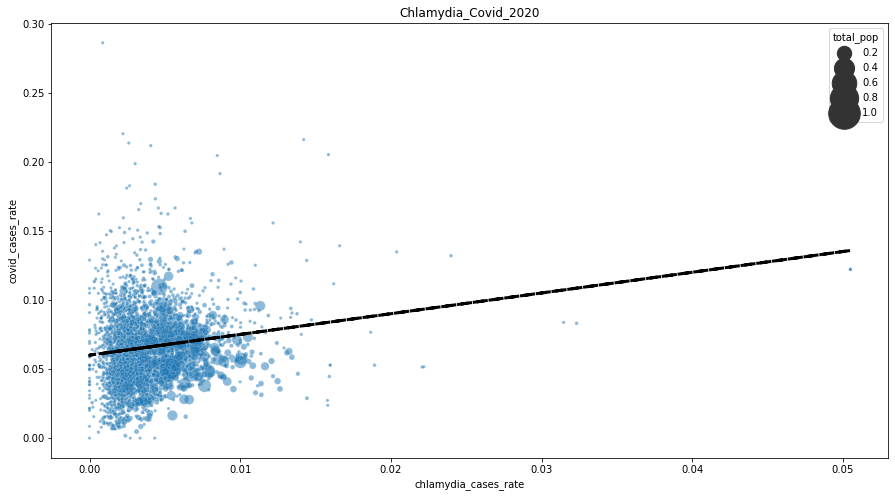

In [199]:
plt.figure(figsize = (15,8))
g = sns.scatterplot(x = df5['chlamydia_cases_rate'],y = df5['covid_cases_rate'],size = df5.total_pop,sizes=(10, 1000),alpha=0.5)

m, b = np.polyfit(df5['chlamydia_cases_rate'], df5['covid_cases_rate'], 1)
plt.plot(df5['chlamydia_cases_rate'], m*df5['chlamydia_cases_rate']+b, linestyle='--', color='k', lw=3, scalex=False, scaley=False)

# sns.lineplot(x = [1,2],y =[1,2])
plt.title("Chlamydia_Covid_2020")
plt.savefig("../Output/EDA/Chlamydia_Covid_2020_scatterplot.png",dpi = 300)
# plt.axhline(y=0,c="black")
plt.show()

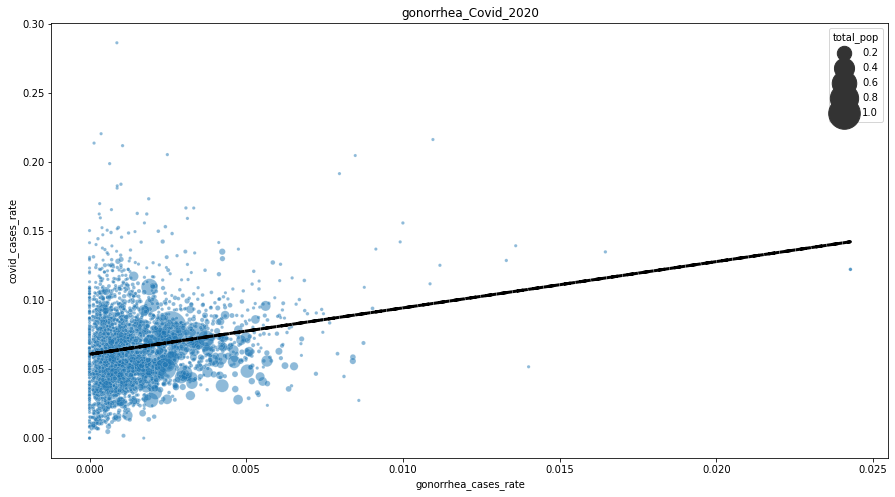

In [200]:
plt.figure(figsize = (15,8))
g = sns.scatterplot(x = df5['gonorrhea_cases_rate'],y = df5['covid_cases_rate'],size = df5.total_pop,sizes=(10, 1000),alpha=0.5)

m, b = np.polyfit(df5['gonorrhea_cases_rate'], df5['covid_cases_rate'], 1)
plt.plot(df5['gonorrhea_cases_rate'], m*df5['gonorrhea_cases_rate']+b, linestyle='--', color='k', lw=3, scalex=False, scaley=False)

# sns.lineplot(x = [1,2],y =[1,2])
plt.title("gonorrhea_Covid_2020")
plt.savefig("../Output/EDA/gonorrhea_Covid_2020scatterplot.png",dpi = 300)
# plt.axhline(y=0,c="black")
plt.show()

In [141]:
df4['chlamydia_cases_rate']

0       0.005661
1       0.003601
2       0.006194
3       0.005497
4       0.002909
          ...   
3225    0.000959
3226    0.000882
3227    0.000319
3228         NaN
3229         NaN
Name: chlamydia_cases_rate, Length: 3230, dtype: float64

In [188]:
data_HIV = pd.read_csv("../Data/Clean/CDC/disagRaceSexHIV2017_2020_clean.csv")

In [189]:
data_HIV = data_HIV.loc[:,["year","fips","cases_female_hiv_diagnoses","cases_female_hiv_prevalence","cases_male_hiv_diagnoses","cases_male_hiv_prevalence"]]

data_HIV.head()

,year,fips,cases_female_hiv_diagnoses,cases_female_hiv_prevalence,cases_male_hiv_diagnoses,cases_male_hiv_prevalence
0,2017,45001,0.0,12.0,0.0,36.0
1,2017,22001,0.0,42.0,6.0,101.0
2,2017,51001,NaN,34.0,NaN,63.0
3,2017,19001,0.0,NaN,0.0,NaN
4,2017,29001,NaN,8.0,NaN,29.0


In [190]:
data_HIV["cases_hiv_diagnoses"] = data_HIV.loc[:,"cases_female_hiv_diagnoses"]+data_HIV.loc[:,"cases_male_hiv_diagnoses"]
data_HIV.head()

,year,fips,cases_female_hiv_diagnoses,cases_female_hiv_prevalence,cases_male_hiv_diagnoses,cases_male_hiv_prevalence,cases_hiv_diagnoses
0,2017,45001,0.0,12.0,0.0,36.0,0.0
1,2017,22001,0.0,42.0,6.0,101.0,6.0
2,2017,51001,NaN,34.0,NaN,63.0,NaN
3,2017,19001,0.0,NaN,0.0,NaN,0.0
4,2017,29001,NaN,8.0,NaN,29.0,NaN


In [191]:
data_HIV["cases_hiv_prevalence"] = data_HIV.loc[:,"cases_female_hiv_prevalence"]+data_HIV.loc[:,"cases_male_hiv_prevalence"]
data_HIV.head()

,year,fips,cases_female_hiv_diagnoses,cases_female_hiv_prevalence,cases_male_hiv_diagnoses,cases_male_hiv_prevalence,cases_hiv_diagnoses,cases_hiv_prevalence
0,2017,45001,0.0,12.0,0.0,36.0,0.0,48.0
1,2017,22001,0.0,42.0,6.0,101.0,6.0,143.0
2,2017,51001,NaN,34.0,NaN,63.0,NaN,97.0
3,2017,19001,0.0,NaN,0.0,NaN,0.0,NaN
4,2017,29001,NaN,8.0,NaN,29.0,NaN,37.0


In [192]:
data_HIV.tail()

,year,fips,cases_female_hiv_diagnoses,cases_female_hiv_prevalence,cases_male_hiv_diagnoses,cases_male_hiv_prevalence,cases_hiv_diagnoses,cases_hiv_prevalence
9975,2020,26149,0.0,5.0,0.0,35.0,0.0,40.0
9976,2020,55123,0.0,NaN,0.0,NaN,0.0,NaN
9977,2020,1129,0.0,NaN,0.0,NaN,0.0,NaN
9978,2020,47183,0.0,0.0,0.0,17.0,0.0,17.0
9979,2020,48495,0.0,NaN,0.0,NaN,0.0,NaN


In [193]:
data_HIV_2020 = data_HIV.iloc[7448:9979]
data_HIV_2020.head()

,year,fips,cases_female_hiv_diagnoses,cases_female_hiv_prevalence,cases_male_hiv_diagnoses,cases_male_hiv_prevalence,cases_hiv_diagnoses,cases_hiv_prevalence
7448,2020,45001,NaN,13.0,NaN,43.0,NaN,56.0
7449,2020,22001,NaN,73.0,NaN,173.0,NaN,246.0
7450,2020,51001,NaN,32.0,NaN,76.0,NaN,108.0
7451,2020,19001,0.0,NaN,0.0,NaN,0.0,NaN
7452,2020,29001,0.0,5.0,0.0,32.0,0.0,37.0


In [194]:
df6= pd.merge(data_HIV_2020, data_pop,
             how = 'outer', on =['year', 'fips'])
df6.head()

,year,fips,cases_female_hiv_diagnoses,cases_female_hiv_prevalence,cases_male_hiv_diagnoses,cases_male_hiv_prevalence,cases_hiv_diagnoses,cases_hiv_prevalence,total_pop
0,2020,45001,NaN,13.0,NaN,43.0,NaN,56.0,24582
1,2020,22001,NaN,73.0,NaN,173.0,NaN,246.0,62371
2,2020,51001,NaN,32.0,NaN,76.0,NaN,108.0,32560
3,2020,19001,0.0,NaN,0.0,NaN,0.0,NaN,7048
4,2020,29001,0.0,5.0,0.0,32.0,0.0,37.0,25468


In [195]:
df6["hiv_diagnoses_cases_rate"] = df6.loc[:,"cases_hiv_diagnoses"]/df6.loc[:,"total_pop"]
df6.head()

,year,fips,cases_female_hiv_diagnoses,cases_female_hiv_prevalence,cases_male_hiv_diagnoses,cases_male_hiv_prevalence,cases_hiv_diagnoses,cases_hiv_prevalence,total_pop,hiv_diagnoses_cases_rate
0,2020,45001,NaN,13.0,NaN,43.0,NaN,56.0,24582,NaN
1,2020,22001,NaN,73.0,NaN,173.0,NaN,246.0,62371,NaN
2,2020,51001,NaN,32.0,NaN,76.0,NaN,108.0,32560,NaN
3,2020,19001,0.0,NaN,0.0,NaN,0.0,NaN,7048,0.0
4,2020,29001,0.0,5.0,0.0,32.0,0.0,37.0,25468,0.0


In [196]:
df6["hiv_prevalence_cases_rate"] = df6.loc[:,"cases_hiv_prevalence"]/df6.loc[:,"total_pop"]
df6.head()

,year,fips,cases_female_hiv_diagnoses,cases_female_hiv_prevalence,cases_male_hiv_diagnoses,cases_male_hiv_prevalence,cases_hiv_diagnoses,cases_hiv_prevalence,total_pop,hiv_diagnoses_cases_rate,hiv_prevalence_cases_rate
0,2020,45001,NaN,13.0,NaN,43.0,NaN,56.0,24582,NaN,0.002278
1,2020,22001,NaN,73.0,NaN,173.0,NaN,246.0,62371,NaN,0.003944
2,2020,51001,NaN,32.0,NaN,76.0,NaN,108.0,32560,NaN,0.003317
3,2020,19001,0.0,NaN,0.0,NaN,0.0,NaN,7048,0.0,NaN
4,2020,29001,0.0,5.0,0.0,32.0,0.0,37.0,25468,0.0,0.001453


In [201]:
df7 = pd.merge(df, df6,
             how = 'outer', on =['year', 'fips', 'total_pop'])
df7.head()

,year,fips,covid_cases,county_name,total_pop,covid_cases_rate,cases_female_hiv_diagnoses,cases_female_hiv_prevalence,cases_male_hiv_diagnoses,cases_male_hiv_prevalence,cases_hiv_diagnoses,cases_hiv_prevalence,hiv_diagnoses_cases_rate,hiv_prevalence_cases_rate
0,2020,1001,4164.0,Autauga County,55639.0,0.074840,NaN,30.0,NaN,84.0,NaN,114.0,NaN,0.002049
1,2020,1003,13392.0,Baldwin County,218289.0,0.061350,NaN,90.0,NaN,254.0,NaN,344.0,NaN,0.001576
2,2020,1005,1492.0,Barbour County,25026.0,0.059618,NaN,44.0,NaN,52.0,NaN,96.0,NaN,0.003836
3,2020,1007,1817.0,Bibb County,22374.0,0.081210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,1009,4584.0,Blount County,57755.0,0.079370,0.0,12.0,0.0,25.0,0.0,37.0,0.0,0.000641


In [202]:
df8 = df7.dropna(subset = ['hiv_diagnoses_cases_rate','hiv_prevalence_cases_rate','covid_cases_rate'])

In [203]:
from sklearn.linear_model import LinearRegression

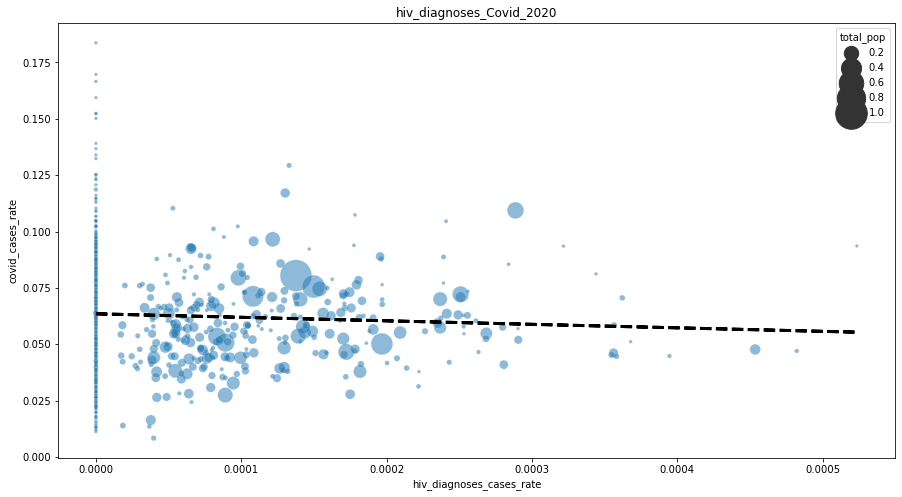

In [204]:
plt.figure(figsize = (15,8))
g = sns.scatterplot(x = df8['hiv_diagnoses_cases_rate'],y = df8['covid_cases_rate'],size = df8.total_pop,sizes=(10, 1000),alpha=0.5)

m, b = np.polyfit(df8['hiv_diagnoses_cases_rate'], df8['covid_cases_rate'], 1)
plt.plot(df8['hiv_diagnoses_cases_rate'], m*df8['hiv_diagnoses_cases_rate']+b, linestyle='--', color='k', lw=3, scalex=False, scaley=False)

# sns.lineplot(x = [1,2],y =[1,2])
plt.title("hiv_diagnoses_Covid_2020")
plt.savefig("../Output/EDA/hiv_diagnoses_Covid_2020_scatterplot.png",dpi = 300)
# plt.axhline(y=0,c="black")
plt.show()

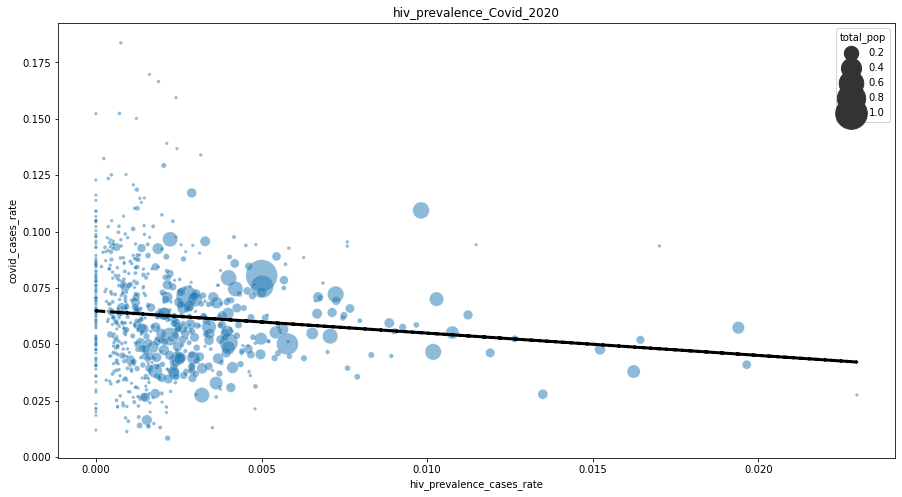

In [205]:
plt.figure(figsize = (15,8))
g = sns.scatterplot(x = df8['hiv_prevalence_cases_rate'],y = df8['covid_cases_rate'],size = df8.total_pop,sizes=(10, 1000),alpha=0.5)

m, b = np.polyfit(df8['hiv_prevalence_cases_rate'], df8['covid_cases_rate'], 1)
plt.plot(df8['hiv_prevalence_cases_rate'], m*df8['hiv_prevalence_cases_rate']+b, linestyle='--', color='k', lw=3, scalex=False, scaley=False)

# sns.lineplot(x = [1,2],y =[1,2])
plt.title("hiv_prevalence_Covid_2020")
plt.savefig("../Output/EDA/hiv_prevalence_Covid_2020_scatterplot.png",dpi = 300)
# plt.axhline(y=0,c="black")
plt.show()